## Learning Cartopy

Following along with these blog posts: 
- https://semba-blog.netlify.app/07/04/2020/mapping-with-cartopy-in-python/
- https://rabernat.github.io/research_computing_2018/maps-with-cartopy.html


In [1]:
import numpy as np
import pandas as pd
from cartopy import crs as ccrs
import cartopy.feature as cfeature
import cartopy
import matplotlib.pyplot as plt

### Accessing Maps

Maps can be accessed through the CRS (Coordinate Reference System).
To see a list of all available maps visit the [Cartopy Projection List page](https://scitools.org.uk/cartopy/docs/latest/crs/projections.html).

In [2]:
ccrs.AlbersEqualArea()

In [3]:
ccrs.Miller()

In [4]:
ccrs.InterruptedGoodeHomolosine()

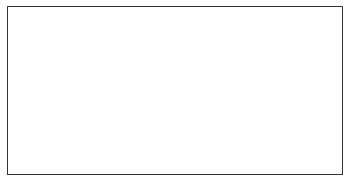

In [5]:
plt.axes(projection=ccrs.PlateCarree())
plt.show()

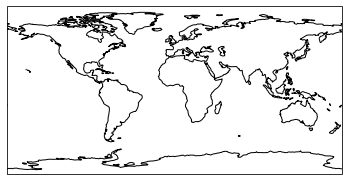

In [6]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
plt.show()

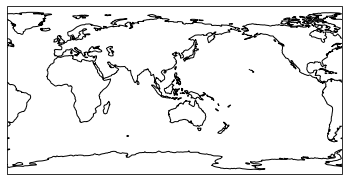

In [7]:
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=120))
ax.coastlines()
plt.show()

In [8]:
projections = [ccrs.PlateCarree(),
               ccrs.Robinson(),
               ccrs.Mercator(),
               ccrs.Orthographic(),
               ccrs.InterruptedGoodeHomolosine()
              ]

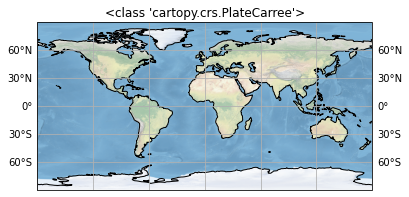

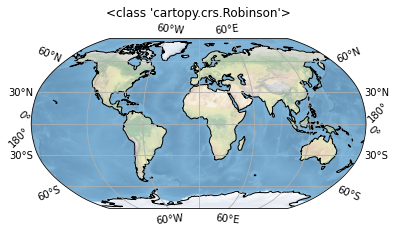

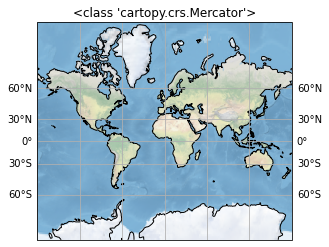

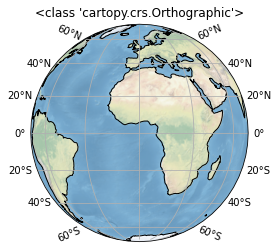

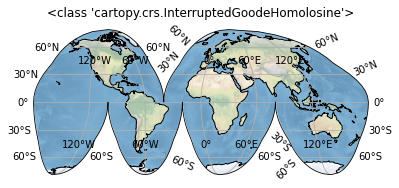

In [9]:
for proj in projections:
    plt.figure()
    ax = plt.axes(projection=proj)
    ax.stock_img()
    ax.coastlines()
    ax.set_title(f'{type(proj)}')
    ax.gridlines(draw_labels=True)
    plt.show()

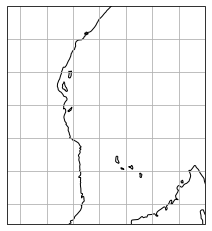

In [10]:
central_lon = 43
central_lat = -8.5
extent = [35, 50, -16.5, 0]

plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree(central_lon))
ax.set_extent(extent)
ax.gridlines()
ax.coastlines(resolution='50m')
plt.show()

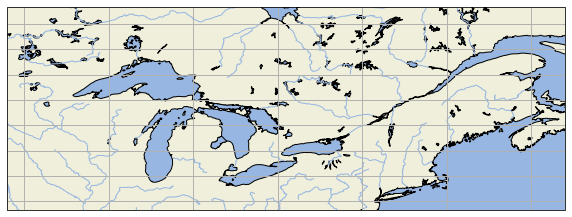

In [11]:

central_lat = 37.5
central_lon = -96
extent = [-96, -63, 52, 40]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent, crs=ccrs.PlateCarree())
ax.gridlines()

ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS)
ax.gridlines(draw_labels=True)
plt.show()

## Now following the other article

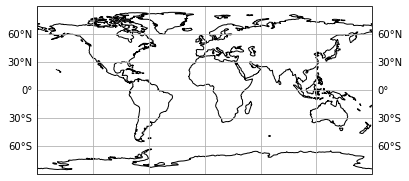

In [12]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
ax.gridlines(draw_labels=True)

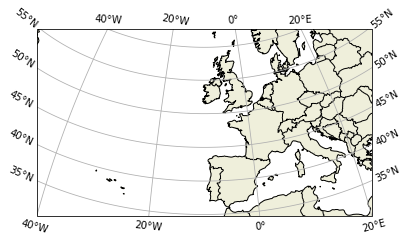

In [13]:
central_lon, central_lat = -10, 45
extent = [-40, 20, 30, 60]
ax = plt.axes(projection=ccrs.Orthographic(central_lon, central_lat))
ax.set_extent(extent)
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.BORDERS)
ax.gridlines(draw_labels=True)
ax.coastlines(resolution='50m')

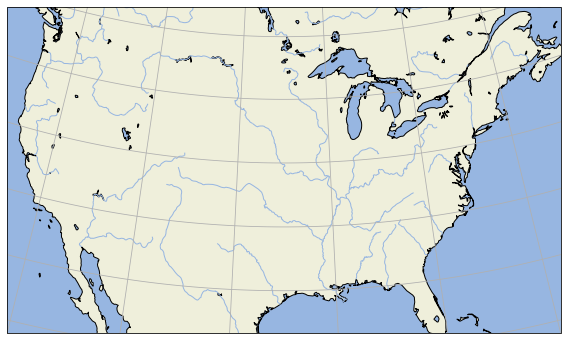

In [14]:


import cartopy.feature as cfeature
import numpy as np

central_lat = 37.5
central_lon = -96
extent = [-120, -70, 24, 50.5]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS)
ax.gridlines()

plt.show()

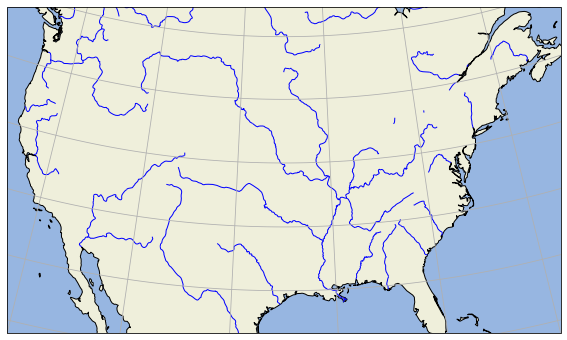

In [15]:
rivers_50m = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '50m')

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(rivers_50m, facecolor='None', edgecolor='b')
ax.gridlines()


In [16]:


# create some test data
new_york = dict(lon=-74.0060, lat=40.7128)
honolulu = dict(lon=-157.8583, lat=21.3069)
lons = [new_york['lon'], honolulu['lon']]
lats = [new_york['lat'], honolulu['lat']]



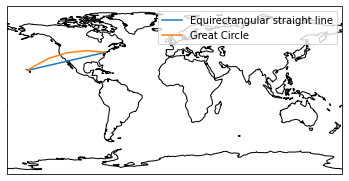

In [17]:


ax = plt.axes(projection=ccrs.PlateCarree())
ax.plot(lons, lats, label='Equirectangular straight line')
ax.plot(lons, lats, label='Great Circle', transform=ccrs.Geodetic())
ax.coastlines()
ax.legend()
ax.set_global()



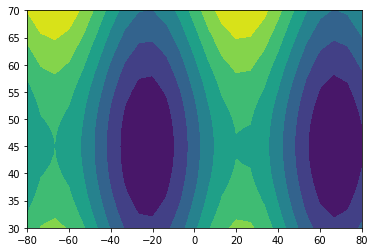

In [18]:
import numpy as np
lon = np.linspace(-80, 80, 25)
lat = np.linspace(30, 70, 25)
lon2d, lat2d = np.meshgrid(lon, lat)
data = np.cos(np.deg2rad(lat2d) * 4) + np.sin(np.deg2rad(lon2d) * 4)
plt.contourf(lon2d, lat2d, data)

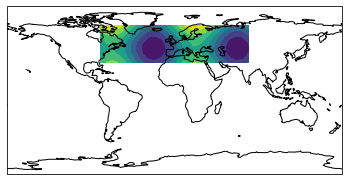

In [19]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.contourf(lon, lat, data)

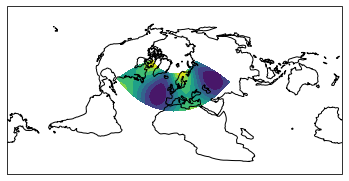

In [20]:
projection = ccrs.RotatedPole(pole_longitude=-177.5, pole_latitude=37.5)
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()
ax.contourf(lon, lat, data, transform=ccrs.PlateCarree())

In [21]:
! wget https://lance-modis.eosdis.nasa.gov/imagery/gallery/2012270-0926/Miriam.A2012270.2050.2km.jpg

--2021-01-08 08:58:33--  https://lance-modis.eosdis.nasa.gov/imagery/gallery/2012270-0926/Miriam.A2012270.2050.2km.jpg
Resolving lance-modis.eosdis.nasa.gov (lance-modis.eosdis.nasa.gov)... 198.118.194.28
Connecting to lance-modis.eosdis.nasa.gov (lance-modis.eosdis.nasa.gov)|198.118.194.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 256220 (250K) [image/jpeg]
Saving to: ‘Miriam.A2012270.2050.2km.jpg.1’

Miriam.A2012270.205 100%[===================>] 250.21K  1.46MB/s    in 0.2s    

2021-01-08 08:58:34 (1.46 MB/s) - ‘Miriam.A2012270.2050.2km.jpg.1’ saved [256220/256220]



Text(-117, 33, 'San Diego')

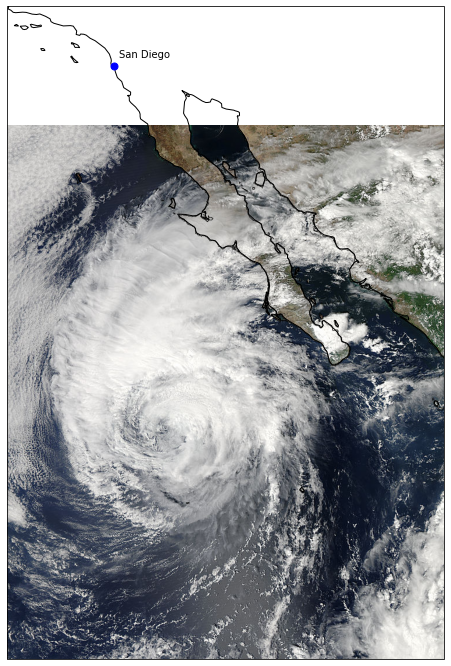

In [22]:
fig = plt.figure(figsize=(8, 12))

# this is from the cartopy docs
fname = 'Miriam.A2012270.2050.2km.jpg'
img_extent = (-120.67660000000001, -106.32104523100001, 13.2301484511245, 30.766899999999502)
img = plt.imread(fname)

ax = plt.axes(projection=ccrs.PlateCarree())

# set a margin around the data
ax.set_xmargin(0.05)
ax.set_ymargin(0.10)

# add the image. Because this image was a tif, the "origin" of the image is in the
# upper left corner
ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='black', linewidth=1)

# mark a known place to help us geo-locate ourselves
ax.plot(-117.1625, 32.715, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-117, 33, 'San Diego', transform=ccrs.Geodetic())

In [23]:
import xarray as xr
ds = xr.open_dataset('NOAA_NCDC_ERSST_v3b_SST.nc')
ds

FileNotFoundError: [Errno 2] No such file or directory: '/Users/kyle/projects/earthscience/notebooks/Cartopy Examples/NOAA_NCDC_ERSST_v3b_SST.nc'